# Visualisation Routines

This notebook demonstrates the visualisation routines available in `opticam`. These routines can ne helpful for sanity checking data, and informing reduction parameters (e.g., aperture sizes).

## Generating Data

First, let's generate some data:

In [1]:
import opticam

opticam.generate_observations(
    out_dir='visualisation_tutorial/data',  # path to the directory where the generated data will be saved
    circular_aperture=False,  # disable circular aperture shadow
    n_images=20,
    )

[OPTICAM] variable source is at (131, 115)
[OPTICAM] variability RMS: 0.02 %
[OPTICAM] variability frequency: 0.135 Hz
[OPTICAM] variability phase lags:
    [OPTICAM] g-band: 0.000 radians
    [OPTICAM] r-band: 1.571 radians
    [OPTICAM] i-band: 3.142 radians


Generating observations: 100%|██████████|[00:06<00:00]


Now let's define a `Reducer` instance:

[OPTICAM] visualisation_tutorial/reduced not found, attempting to create ...
[OPTICAM] visualisation_tutorial/reduced created.


[OPTICAM] Scanning data directory: 100%|██████████|[00:00<00:00]


[OPTICAM] Binning: 4x4
[OPTICAM] Filters: g-band, r-band, i-band
[OPTICAM] 20 g-band images.
[OPTICAM] 20 r-band images.
[OPTICAM] 20 i-band images.


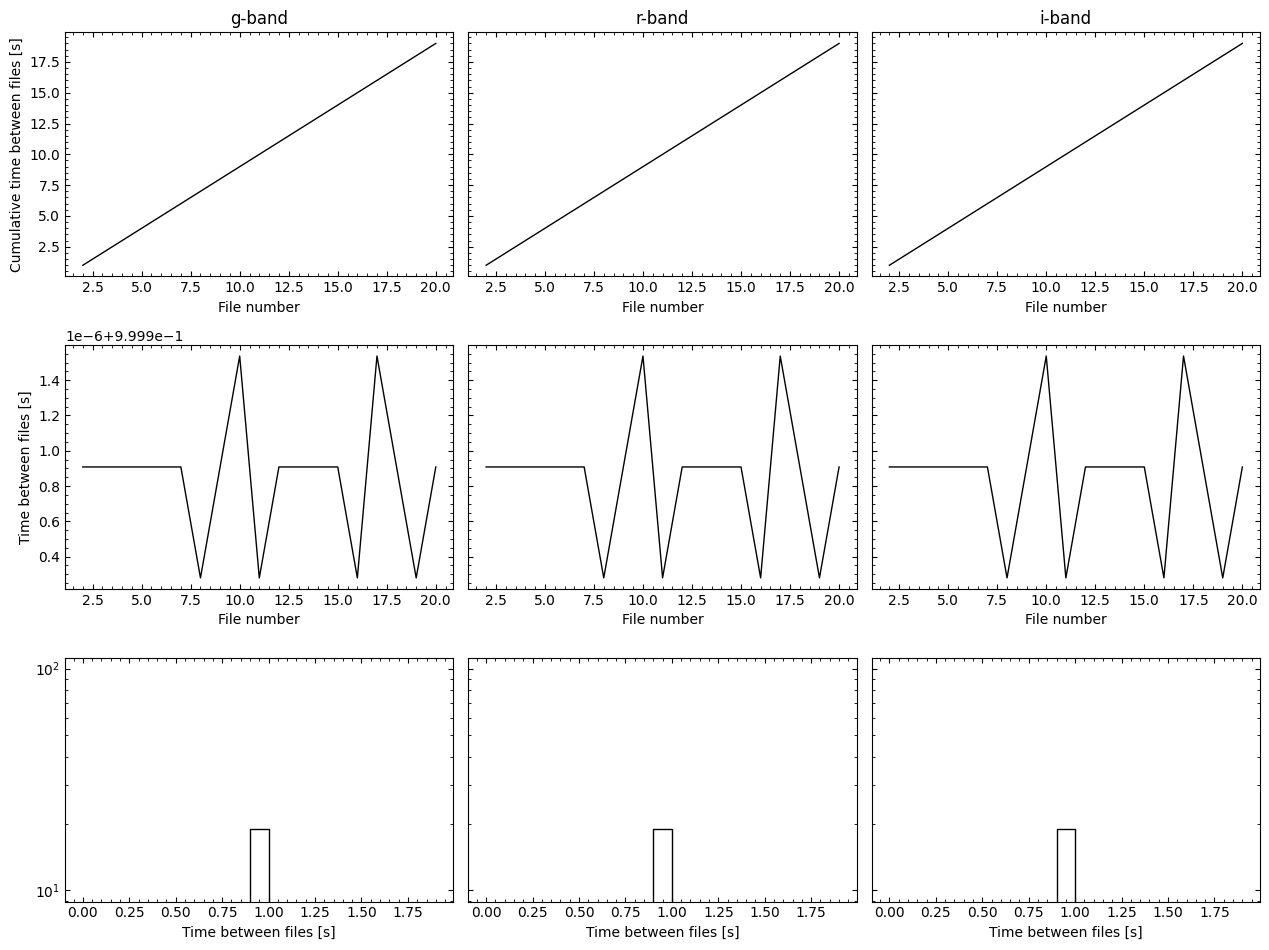

In [2]:
reducer = opticam.Reducer(
    out_directory='visualisation_tutorial/reduced',
    data_directory='visualisation_tutorial/data',
    )

## Background Meshes

When constructing a background image, it's important to verify that the mesh size is suitable. Generally, the mesh boxes should be small so that variations in the background across the image can be captured. However, the mesh boxes shouldn't be smaller than the typical source size. By default, `opticam` defines the background's `box_size` parameter such that images are divided into a 32x32 mesh. Let's check this default mesh size:

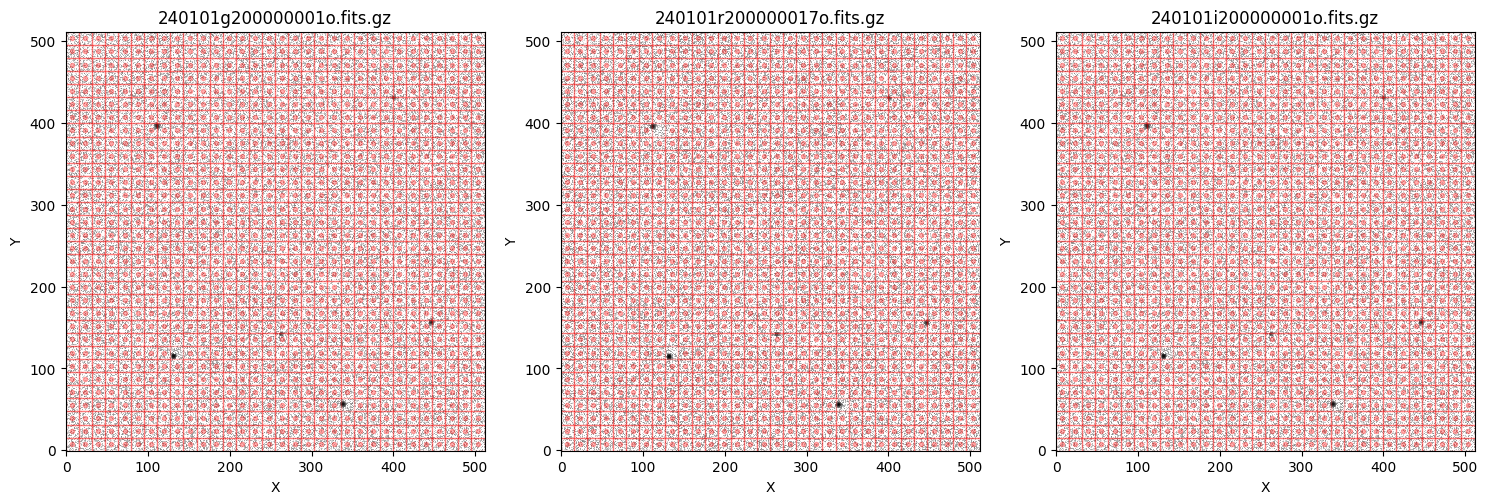

In [3]:
reducer.plot_background_meshes()

We can see that the default mesh size looks pretty good in this case. Note that each time `plot_background_meshes()` is called, a random image is shown for each filter and the chosen file's name is shown in the title of each panel. If we call `plot_background_meshes()` again, we'll get different files:

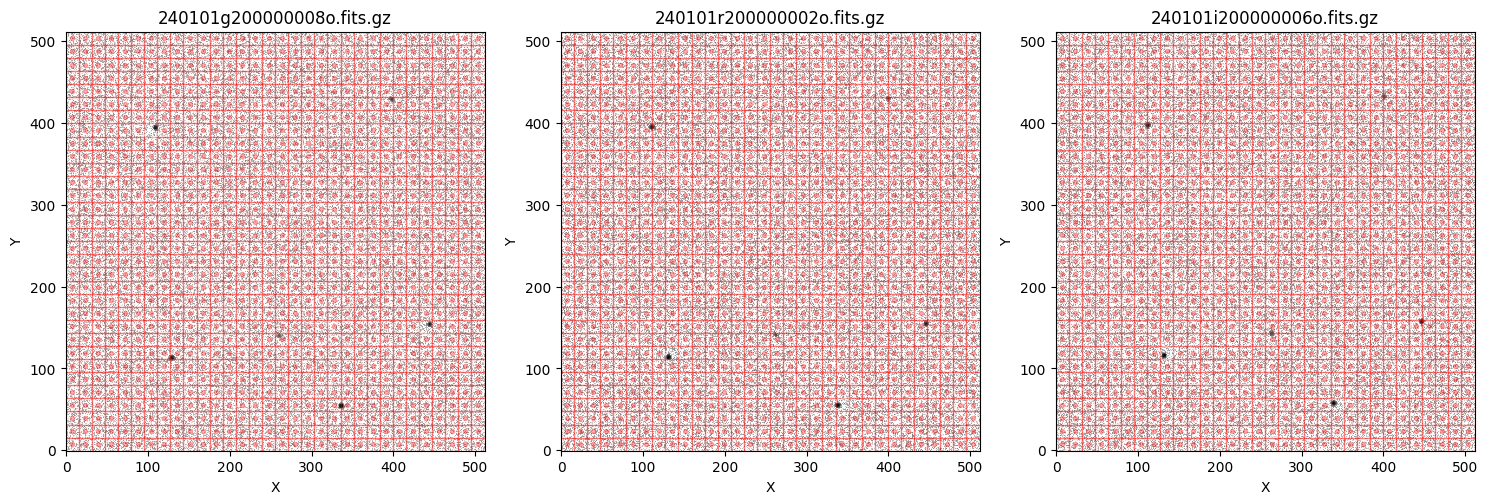

In [4]:
reducer.plot_background_meshes()

Let's define a new reducer instance that uses a background estimator with a larger `box_size` value:

[OPTICAM] visualisation_tutorial/custom_reduced not found, attempting to create ...
[OPTICAM] visualisation_tutorial/custom_reduced created.


[OPTICAM] Scanning data directory: 100%|██████████|[00:00<00:00]


[OPTICAM] Binning: 4x4
[OPTICAM] Filters: g-band, r-band, i-band
[OPTICAM] 20 g-band images.
[OPTICAM] 20 r-band images.
[OPTICAM] 20 i-band images.


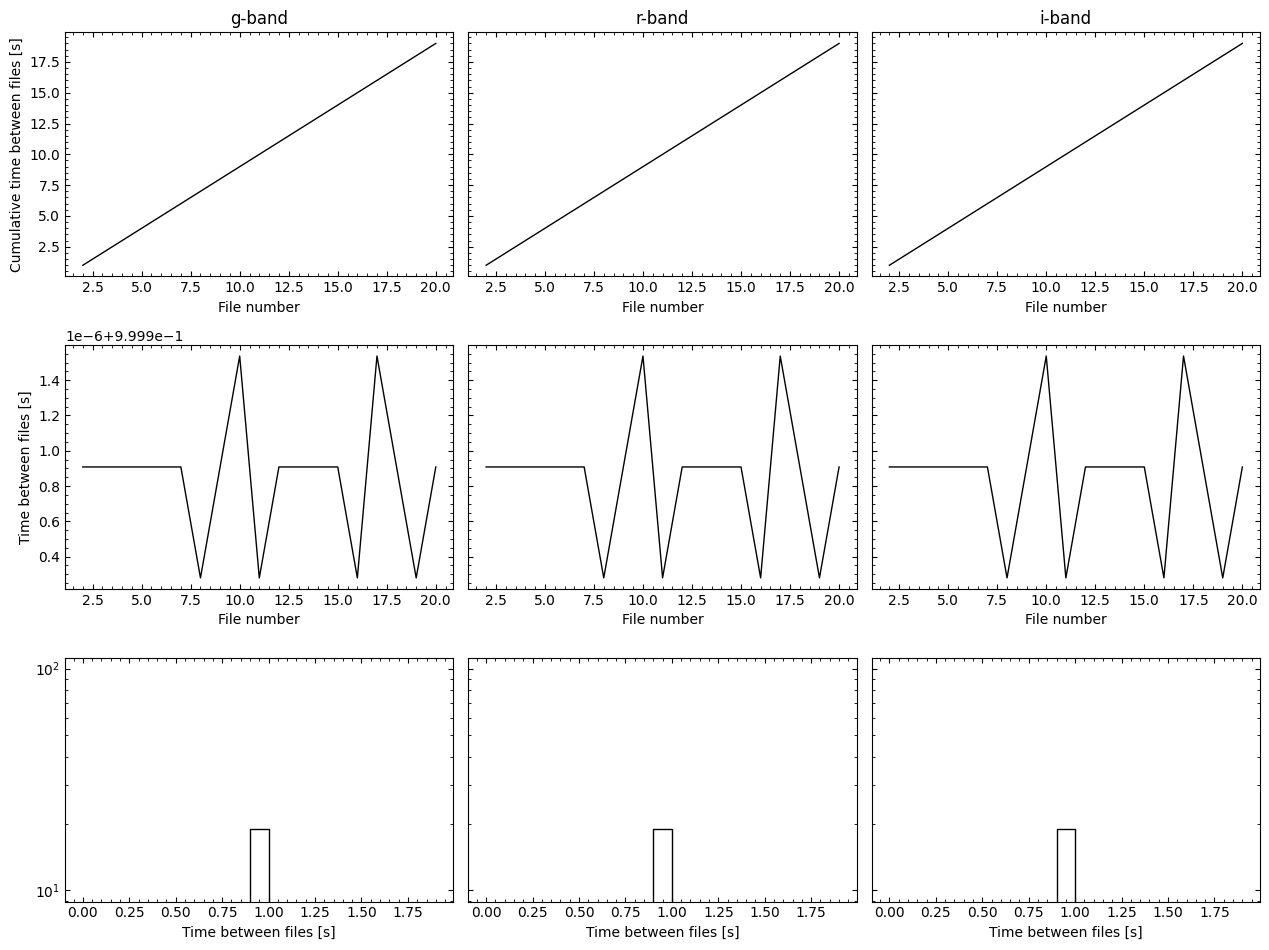

In [5]:
custom_background = opticam.DefaultBackground(box_size=32)

custom_reducer = opticam.Reducer(
    out_directory='visualisation_tutorial/custom_reduced',
    data_directory='visualisation_tutorial/data',
    background=custom_background,
    )

Let's see how this custom background mesh compares to the default one:

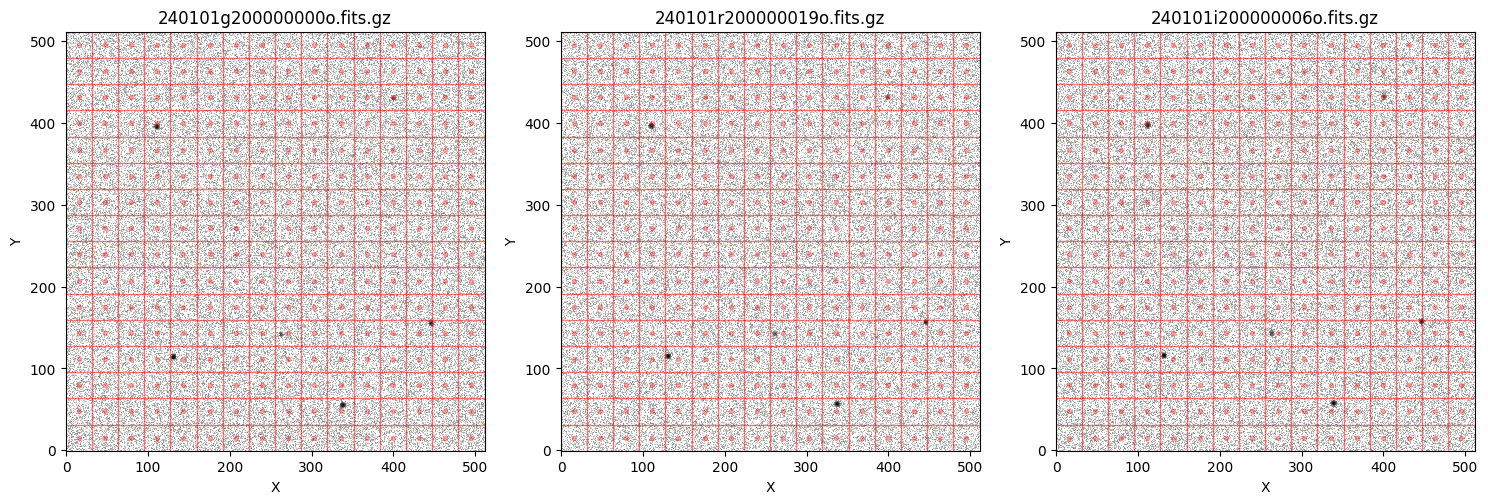

In [6]:
custom_reducer.plot_background_meshes()

We can see that the custom mesh is much larger - probably too large. Let's stick with the default one for now.

As mentioned above, the images shown when `plot_background_meshes()` is called are random. However, this is only true if sources have not been cataloged. Once source catalogs have been created, `plot_background_meshes()` will use the stacked catalog images. Let's therefore catalog the sources:

[OPTICAM] Creating source catalogs


[OPTICAM] Aligning g-band images: 100%|██████████|[00:00<00:00]


[OPTICAM] Done.
[OPTICAM] 20 image(s) aligned.
[OPTICAM] 0 image(s) could not be aligned.


[OPTICAM] Aligning r-band images: 100%|██████████|[00:00<00:00]


[OPTICAM] Done.
[OPTICAM] 20 image(s) aligned.
[OPTICAM] 0 image(s) could not be aligned.


[OPTICAM] Aligning i-band images: 100%|██████████|[00:00<00:00]


[OPTICAM] Done.
[OPTICAM] 20 image(s) aligned.
[OPTICAM] 0 image(s) could not be aligned.


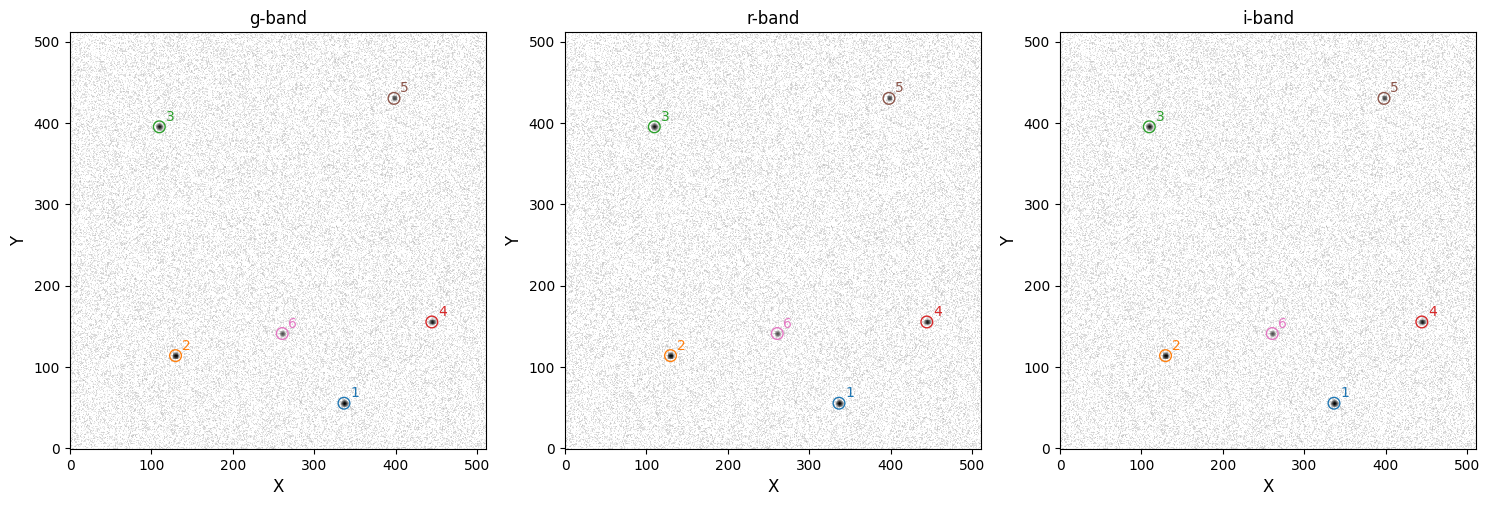

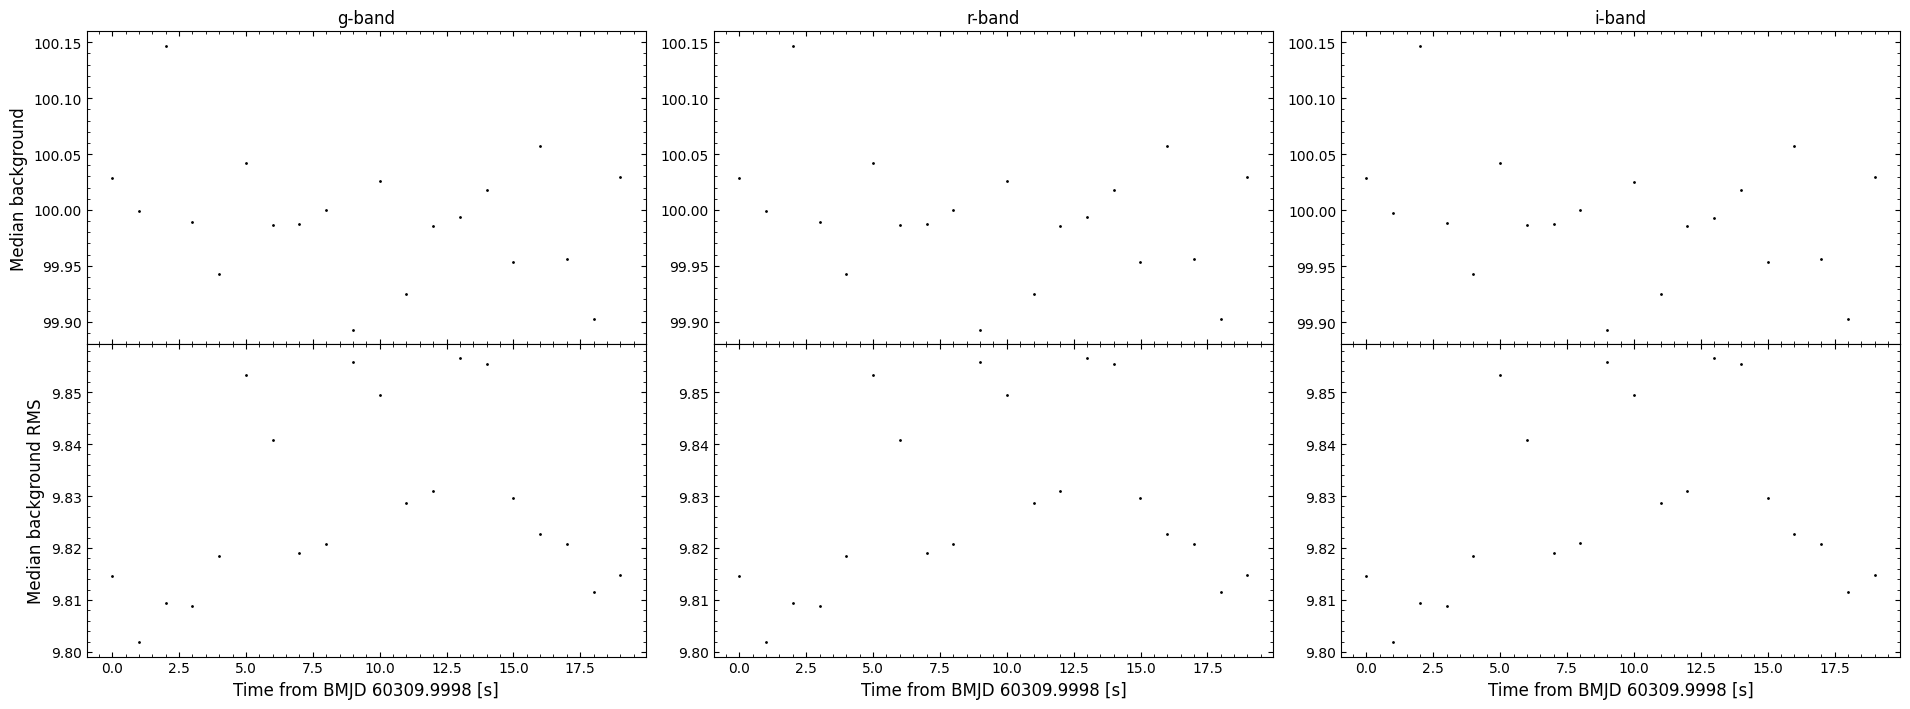

In [7]:
reducer.create_catalogs()

Now when we call `plot_background_meshes()`, each panel will have the corresponding filter as the title instead of a random file name:

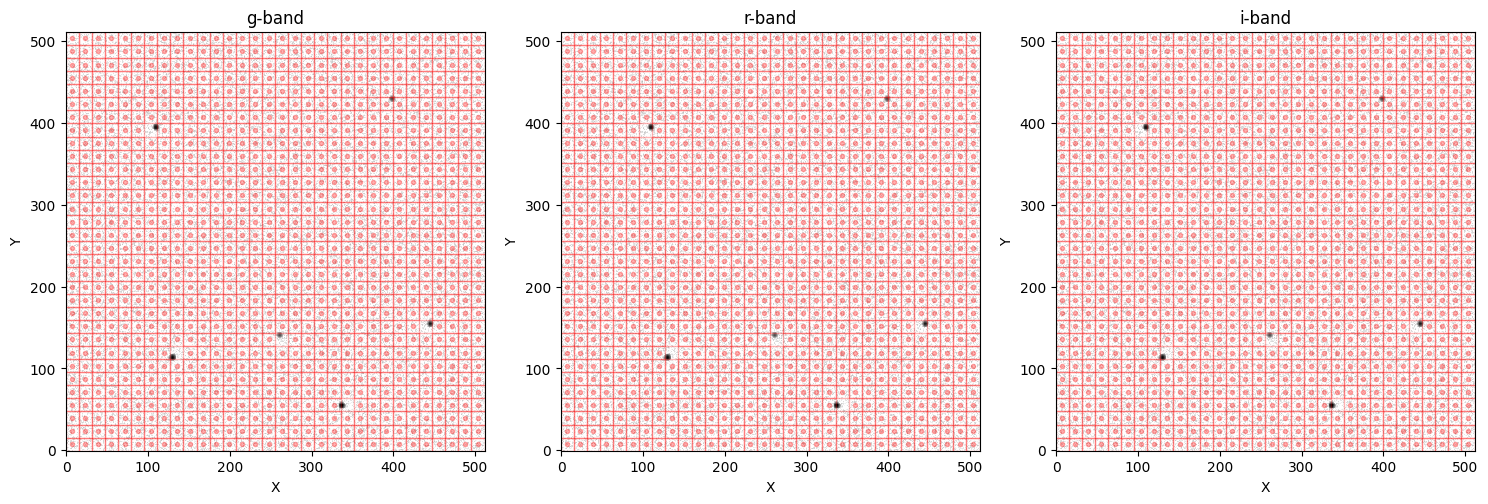

In [8]:
reducer.plot_background_meshes()

We can also save the image as a PDF file by passing `save=True`. This will save the mesh plot to `out_directory/diag/background_meshes.pdf`. Let's check if such a file exists in this case:

In [9]:
import os

print(os.path.isfile('visualisation_tutorial/reduced/diag/background_meshes.pdf'))

False


We can see that the file does not yet exist, so let's create it:

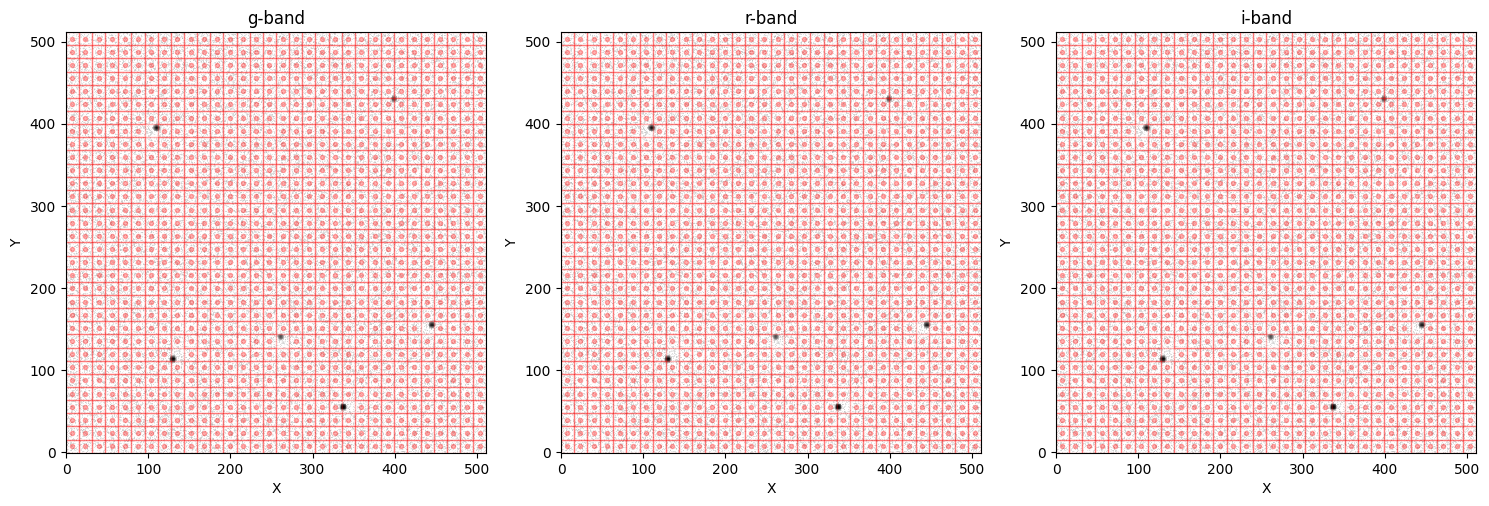

In [10]:
reducer.plot_background_meshes(save=True)

In [11]:
print(os.path.isfile('visualisation_tutorial/reduced/diag/background_meshes.pdf'))

True


## Alignment GIFs

Before performing photometry, it's probably a good idea to check that there are no issues in the image-to-image alignments. This can be done in `opticam` by calling the `create_gifs()` method of `Reducer`, which generates GIF files showing the image-to-image alignments for each filter:

In [12]:
reducer.create_gifs(overwrite=True)

[OPTICAM] Creating g-band GIF frames: 100%|██████████|[00:00<00:00]
[OPTICAM] Creating r-band GIF frames: 100%|██████████|[00:00<00:00]
[OPTICAM] Creating i-band GIF frames: 100%|██████████|[00:00<00:00]


The resulting GIF files are stored in the `out_directory/cat` directory. Let's take a look at an example:


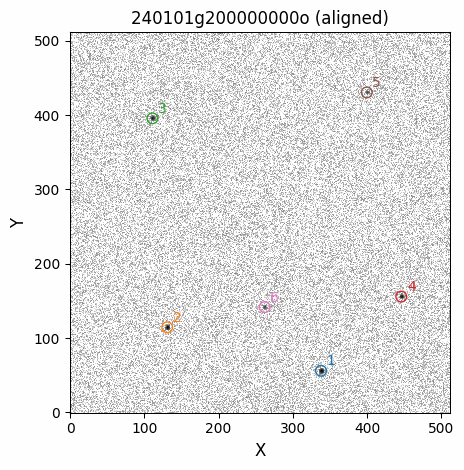

In [13]:
import base64
from IPython.display import HTML

gif = os.path.join(reducer.out_directory, 'cat/g-band_images.gif')

with open(gif, "rb") as f:
    data = f.read()

b64 = base64.b64encode(data).decode("utf-8")
HTML(f'<img src="data:image/gif;base64,{b64}">')

As we can see, the image-to-image alignments look pretty good! The individual frames are also saved to the `out_directory/diag` directory by default, but if you only want to save the gif you can pass `keep_frames=False`.

## Growth Curves

Growth curves can be useful for quantifying the extent of extended sources and/or determining suitable aperture sizes for performing photometry. To generate growth curves in `opticam`, we can call the `plot_growth_curves()` method of a `Reducer` instance. This method requires sources be cataloged before it can be called:

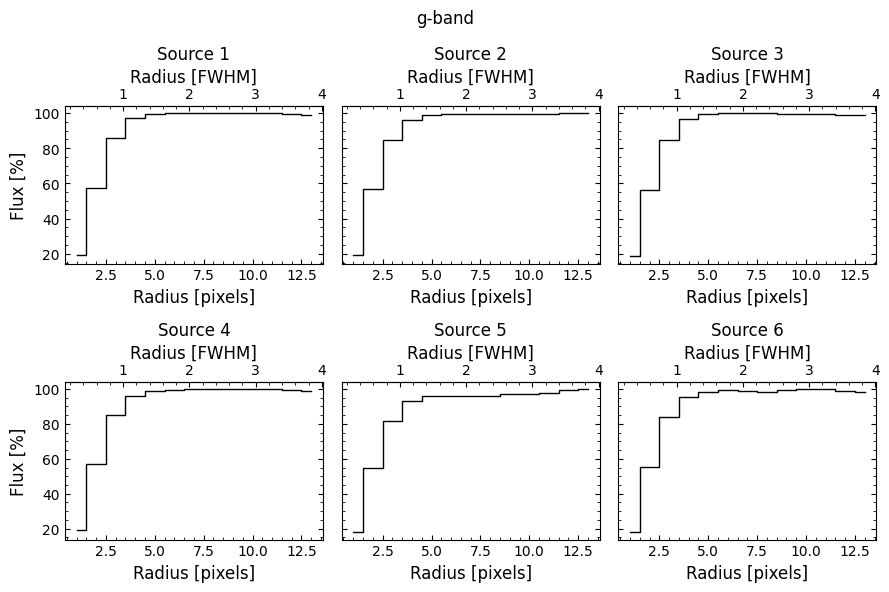

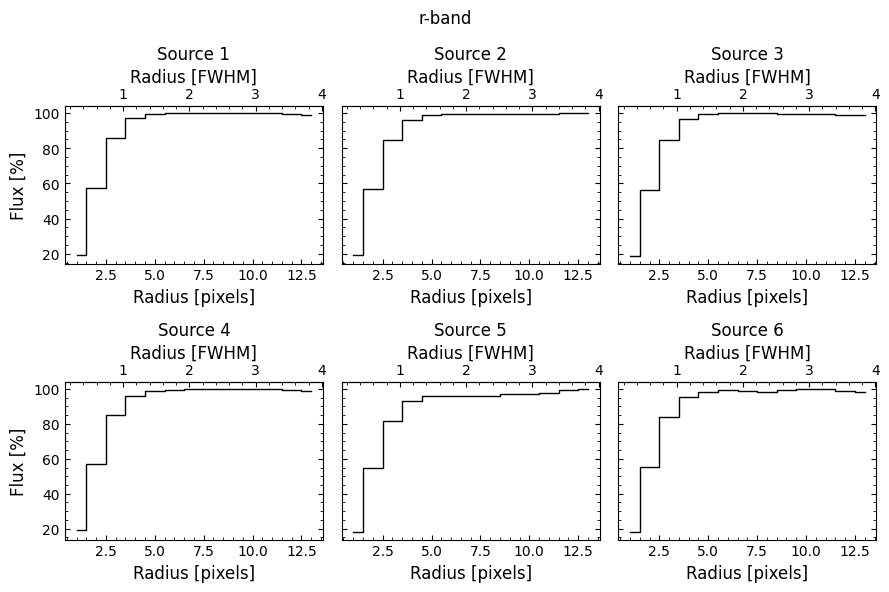

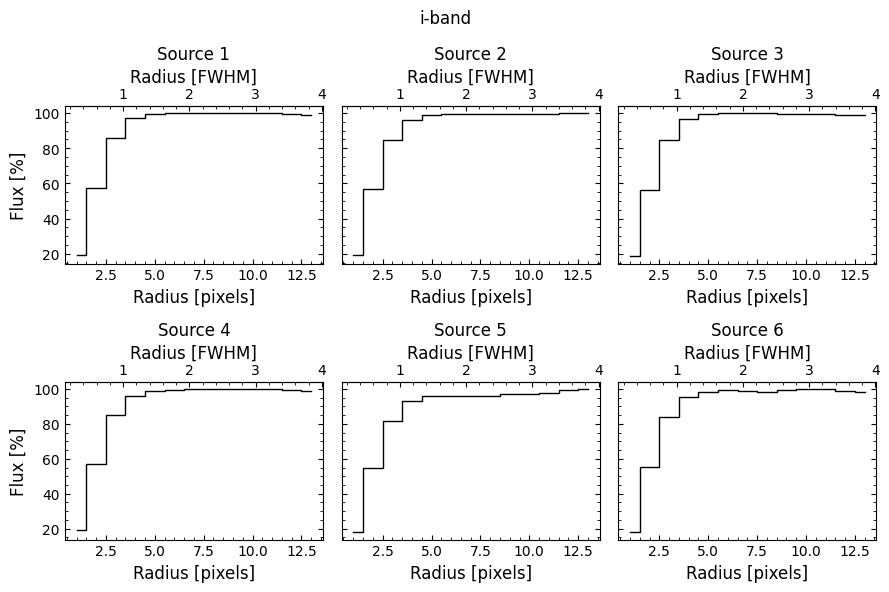

In [14]:
reducer.plot_growth_curves()

By default, `plot_growth_curves()` will generate growth curves for all cataloged sources. This may or may not be desirable. To generate growth curves for only a subset of sources, a target dictionary can be passed. The dictionary keys should list the filters, and the values should give the corresponding target ID(s). A single target ID can be passed as an integer, or a list of IDs can be passed:

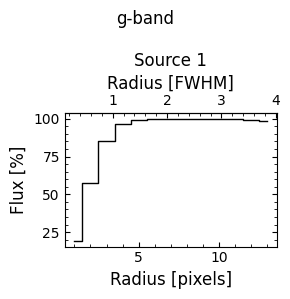

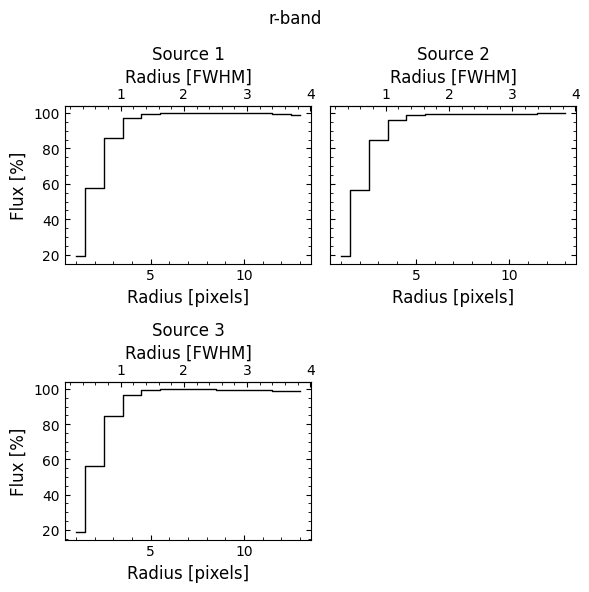

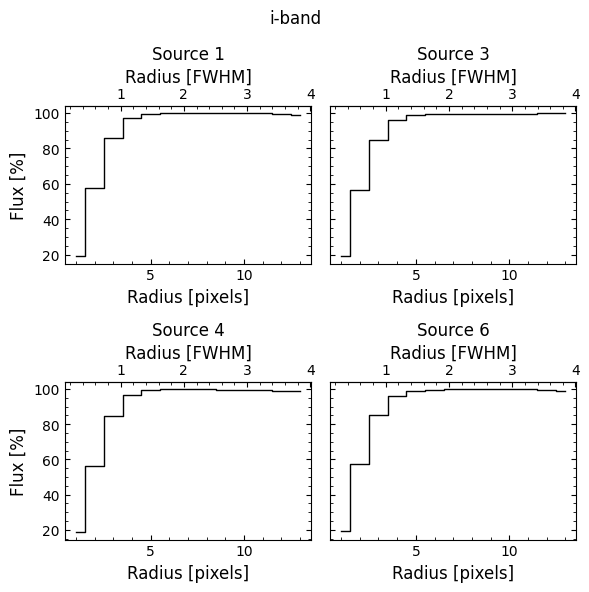

In [15]:
targets = {
    'g-band': 1,
    'r-band': [1, 2, 3],
    'i-band': [1, 3, 4, 6],
}

reducer.plot_growth_curves(targets=targets)

Growth curves can also be saved by passing `save=True`. This will save the growth curves to the `out_directory/diag/growth_curves` directory as separate PDF files for each filter.

## Apertures

When performing photometry, it is a good idea to check how the size of an aperture compares to the source sizes. In `opticam`, aperture plots can be generated by defining an `AperturePhotometer` instance and passing it to the `plot_apertures()` method of `Reducer`. By default, this will produce a plot for each source in each filter's catalog:

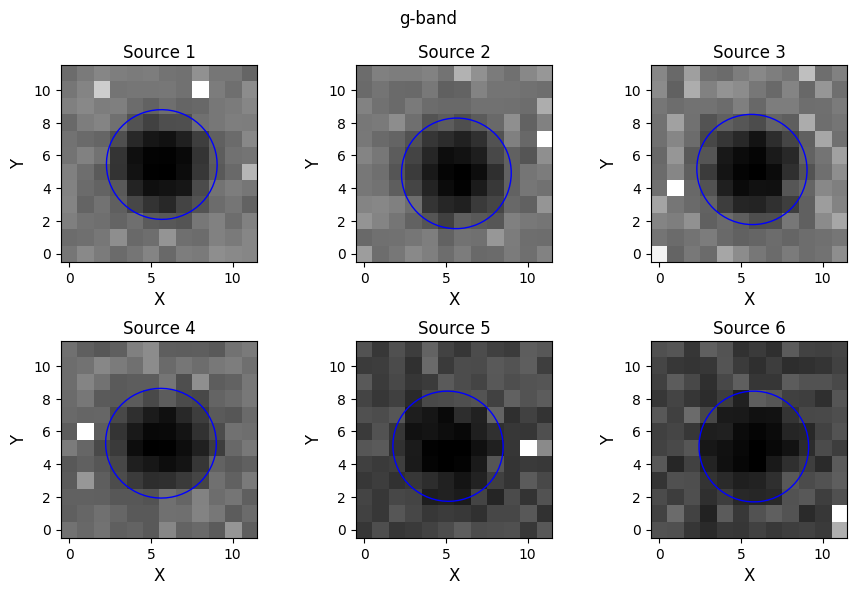

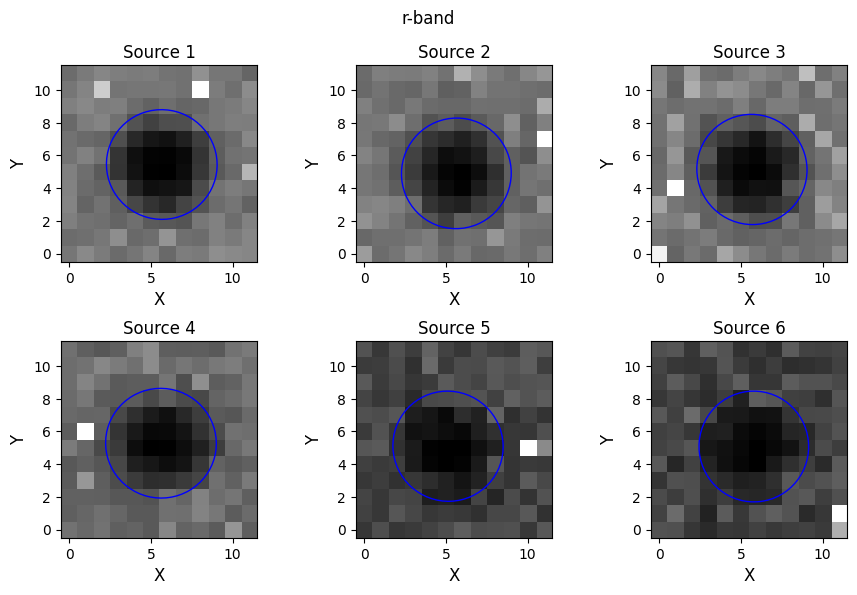

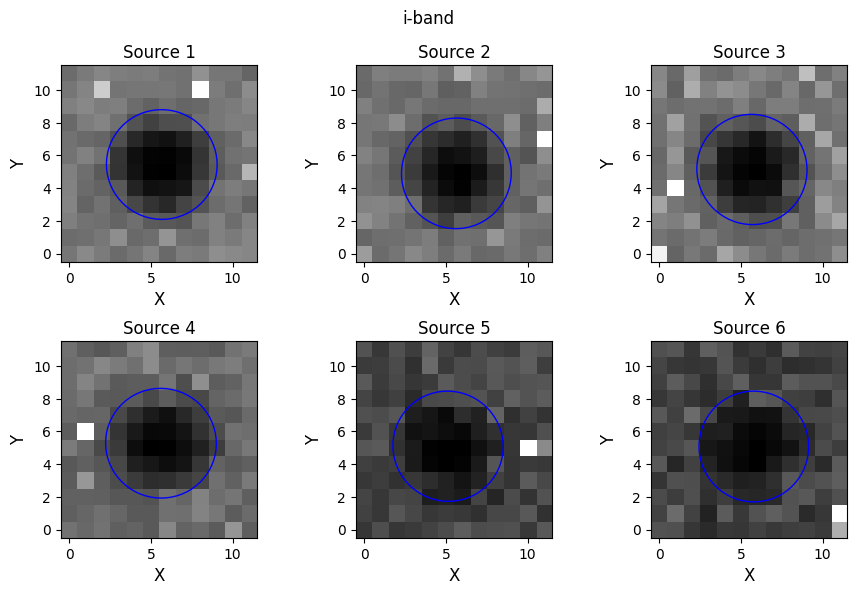

In [16]:
phot = opticam.AperturePhotometer()

reducer.plot_apertures(photometer=phot)

Alternatively, we can pass a target dictionary to only create plots for specific targets, as in the case of the `plot_growth_curves()` method:

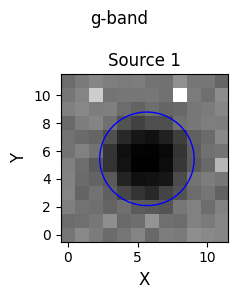

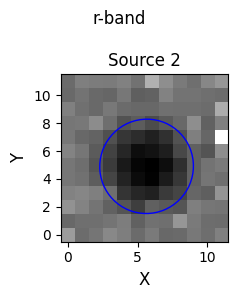

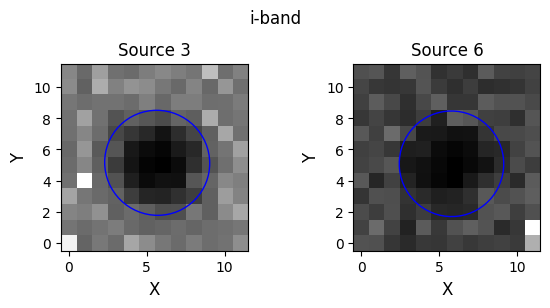

In [17]:
targets = {
    'g-band': 1,
    'r-band': 2,
    'i-band': [3, 6],
}

reducer.plot_apertures(
    photometer=phot,
    targets=targets,
    )

If the `AperturePhotometer` instance uses a local background estimator, we can also use `plot_apertures()` to inspect the annuli used to estimate the local backgrounds. This is especially useful for checking which pixels in an annulus have been sigma-clipped:

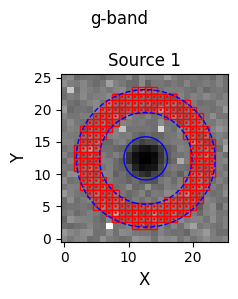

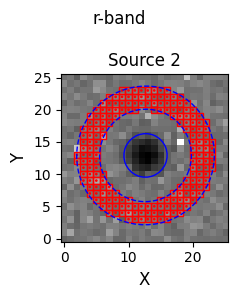

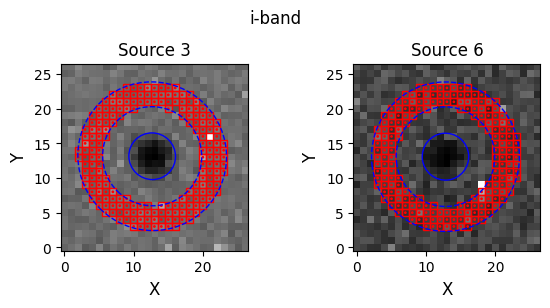

In [18]:
annulus_phot = opticam.AperturePhotometer(
    local_background_estimator=opticam.DefaultLocalBackground(),
    )

reducer.plot_apertures(
    photometer=annulus_phot,
    targets=targets,
    )

Aperture plots can also be saved by passing `save=True`. This will save the aperture plots to the `out_directory/diag/apertures` directory.

## PSFs

Another useful diagnostic, particularly when performing aperture photometry, is to visualise each camera's PSF. In `opticam`, this can be done by calling the `plot_psfs()` method of `Reducer`:

In [19]:
reducer.plot_psfs()

[OPTICAM] Plotting g-band PSFs: 100%|██████████|[00:01<00:00]
[OPTICAM] Plotting r-band PSFs: 100%|██████████|[00:01<00:00]
[OPTICAM] Plotting i-band PSFs: 100%|██████████|[00:01<00:00]


`plot_psfs()` requires cataloging sources, and so cannot be called before `create_catalogs()`. Unlike the above methods, `plot_psfs()` does not display any plots, and instead saves them to a `out_directory/psfs` directory. This is because individual plots are created for each source in each filter. Since these plots are saved as PDF files, it is somewhat clunky to display them here:

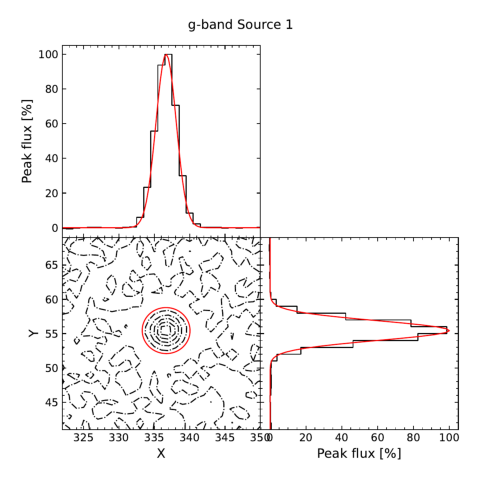

In [20]:
from matplotlib import pyplot as plt
from pdf2image import convert_from_path

dir_path = os.path.join(reducer.out_directory, 'psfs')
psf_plot_files = sorted(os.listdir(dir_path))

# convert PDF pages into a list of PIL.Image.Image instances so they can be plotted with matplotlib
img = convert_from_path(os.path.join(dir_path, psf_plot_files[0]))[0]

fig, ax = plt.subplots(
    figsize=(6, 6)
)

ax.imshow(img)

ax.tick_params(left=False, bottom=False)  # remove ticks
ax.xaxis.set_ticklabels('')  # remove x-axis tick labels
ax.yaxis.set_ticklabels('')  # remove y-axis tick labels
ax.axis('off')  # remove spines

plt.show()

The bottom left panel shows brightness contours (using the stacked catalog image), while the bottom right and top left panels show the brightness profiles along the x- and y-centroids of the source, respectively. The FWHM of the PSF is shown by the red ellipse in the bottom left panel, and the red Gaussians in the top left and bottom right panels show the x- and y-projections of the PSF, respectively. In this case, we can see that this source's PSF can be described as Gaussian to a very good approximation.

Let's take a look at another source:

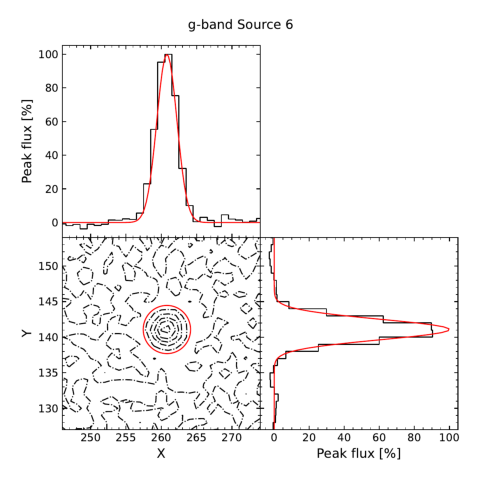

In [21]:
img = convert_from_path(os.path.join(dir_path, psf_plot_files[5]))[0]

fig, ax = plt.subplots(
    figsize=(6, 6)
)

ax.imshow(img)

ax.tick_params(left=False, bottom=False)  # remove ticks
ax.xaxis.set_ticklabels('')  # remove x-axis tick labels
ax.yaxis.set_ticklabels('')  # remove y-axis tick labels
ax.axis('off')  # remove spines

plt.show()

Again, we can see that this source's PSF is approximately Gaussian.

## Signal-to-noise Ratios

Another useful diagnostic is to check the signal-to-noise ratio for each source. In `opticam`, this can be done by calling the `plot_snrs()` method of `Reducer`, which computes the signal-to-noise ratio for each source in each filter using the alignment reference images:

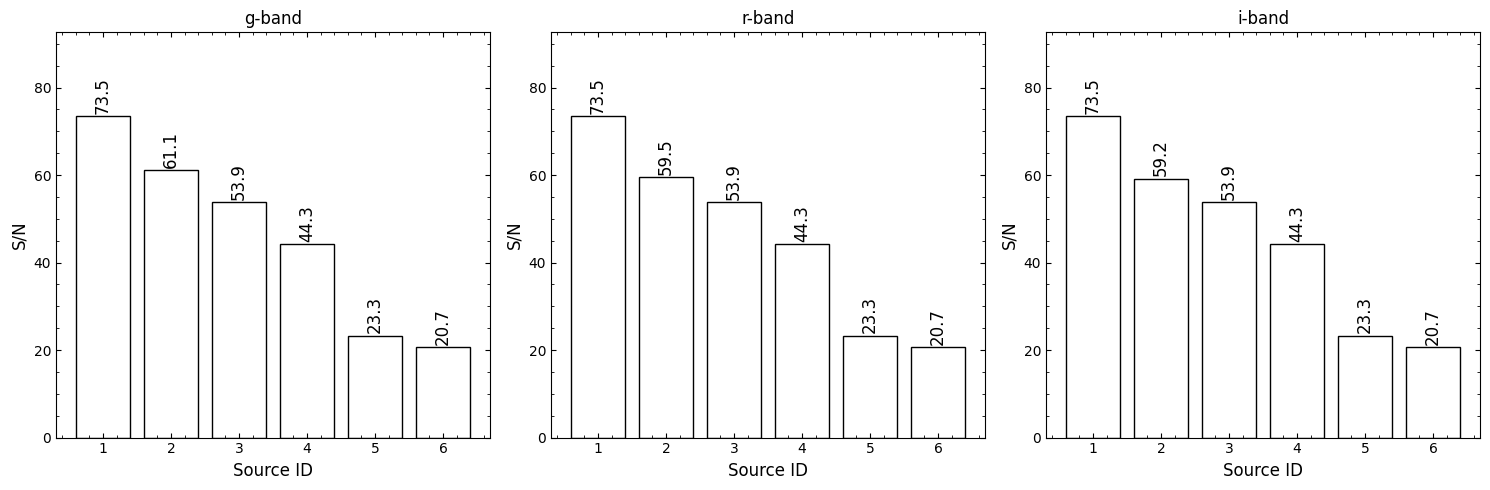

In [22]:
reducer.plot_snrs()

In this case, we can see that all six sources have high signal-to-noise ratios. The resulting plot can also be saved by passing `save=True`, which saves the plot to `out_directory/diag/snrs.pdf`.

Since signal-to-noise ratios are generated using the alignment reference images, they can give unreliable results for highly variable sources. In such cases, it may be preferable to compute a signal-to-noise ratio timeseries (see the [timing methods tutorial](timing_methods.ipynb)).

## Noise Characterisation

In can be useful to characterise the noise contributions during an observation. In `opticam`, this can be done by calling the `plot_noise()` method of `Reducer`:

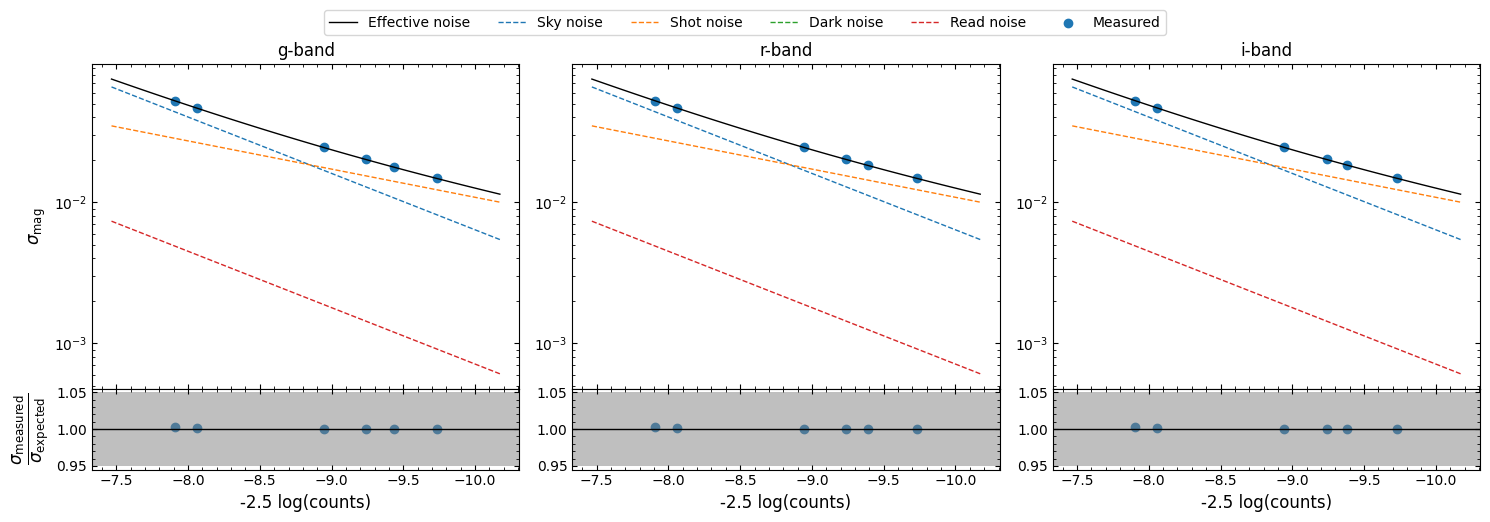

In [23]:
reducer.plot_noise()

In this case, we can see that the noise is largely in the transition from sky-dominated to shot-dominated. We can also see that the read nosie is negligible, and there is no contribution from dark noise (since the simulated dark current in zero).

That concludes the current visualisation routines provided in `opticam`! The routines provided here are intended to make a user's life easier. If you think there are additional visualisation routines that could be added, feel free to open an image on our [GitHub](https://github.com/OPTICAM-instrument/opticam).